P1: Implementation of Correlation and Regression
Objective: Understand the basics of various regression and correlation analysis techniques
using the given “shoping_trends” dataset. You can use Python libraries such as pandas,
scikit-learn, matplotlib, and seaborn to perform these tasks. Interpret your result using
meaningful, relevant terms.
1. Data Loading and Exploration
Load the dataset and plot any 5 different graphs using a variety of variables








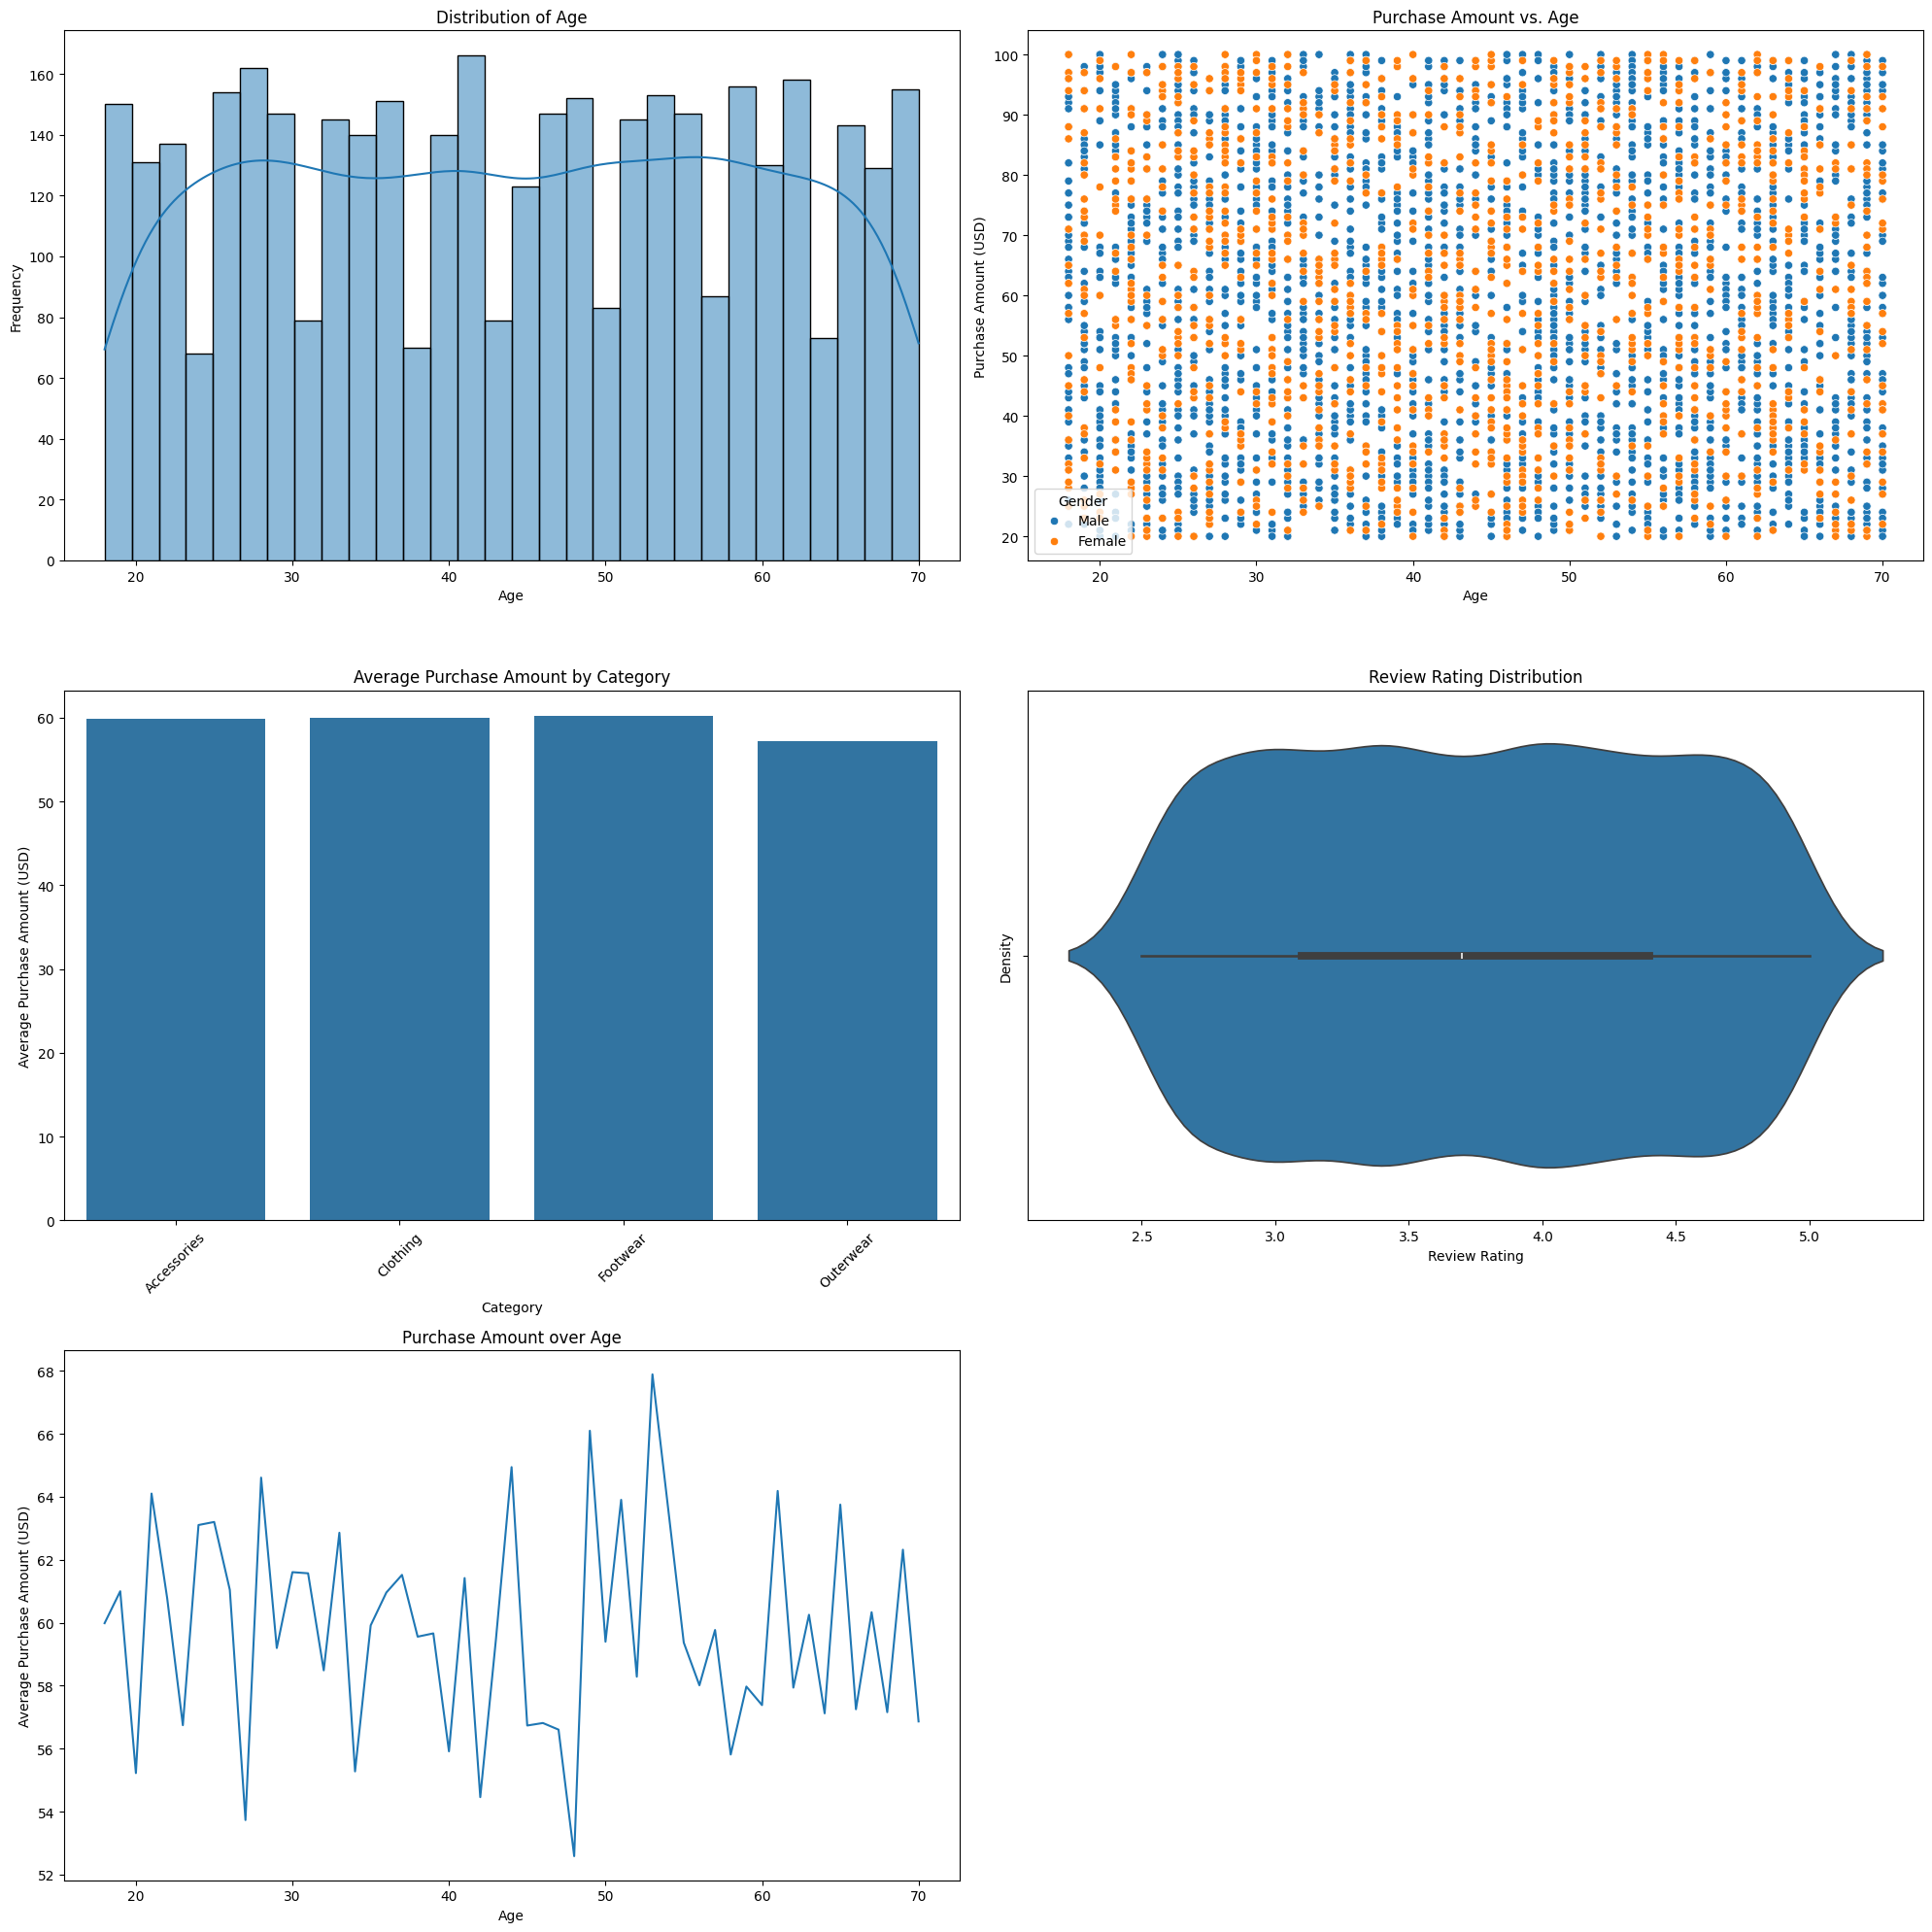

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

# Load the dataset
file_path = "D:/MCA/4th Trm/ADA/Practical/Lab 2/shopping_trends_updated.csv"
df = pd.read_csv(file_path)

# Initialize the figure
plt.figure(figsize=(20, 20))

# Plot 1: Distribution of Age (Histogram)
plt.subplot(3, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot 2: Purchase Amount vs. Age (Scatter Plot)
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender')
plt.title('Purchase Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')

# Plot 3: Average Purchase Amount by Category (Bar Plot)
plt.subplot(3, 2, 3)
category_avg_purchase = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()
sns.barplot(data=category_avg_purchase, x='Category', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)

# Plot 4: Review Rating Distribution (Violin Plot)
plt.subplot(3, 2, 4)
sns.violinplot(data=df, x='Review Rating')
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Density')

# Plot 5: Purchase Amount over Age (Line Plot)
plt.subplot(3, 2, 5)
age_purchase_trend = df.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()
sns.lineplot(data=age_purchase_trend, x='Age', y='Purchase Amount (USD)')
plt.title('Purchase Amount over Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount (USD)')

# Adjust layout
plt.tight_layout()
plt.show()


2. Data Preprocessing:
Encode all categorical variables using Label encoding.
Handle any missing values or outliers.

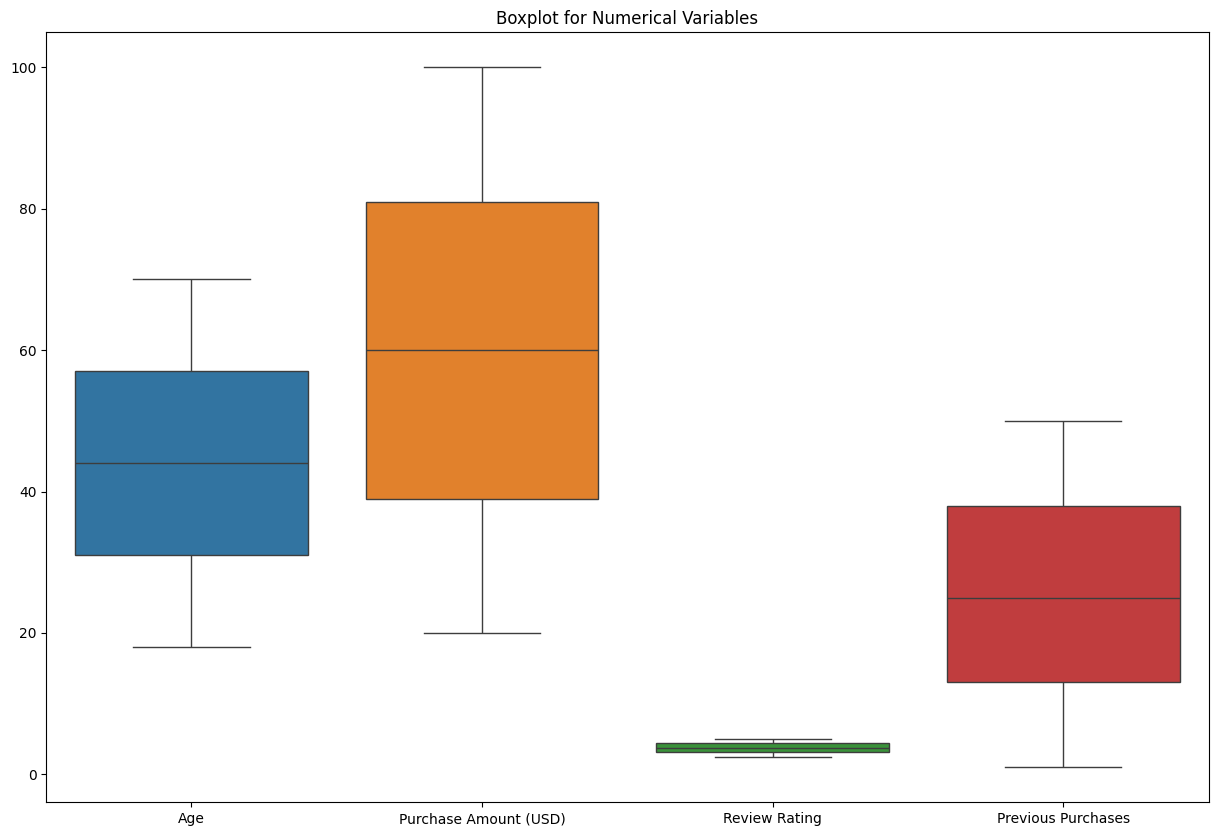

In [3]:
# Initialize Label Encoder
le = LabelEncoder()

# Encode all categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Check for outliers using a boxplot for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']])
plt.title('Boxplot for Numerical Variables')
plt.show()


3. Correlation Analysis:
● Calculate the correlation matrix for all variables.
● Visualize the correlation matrix using a heatmap.

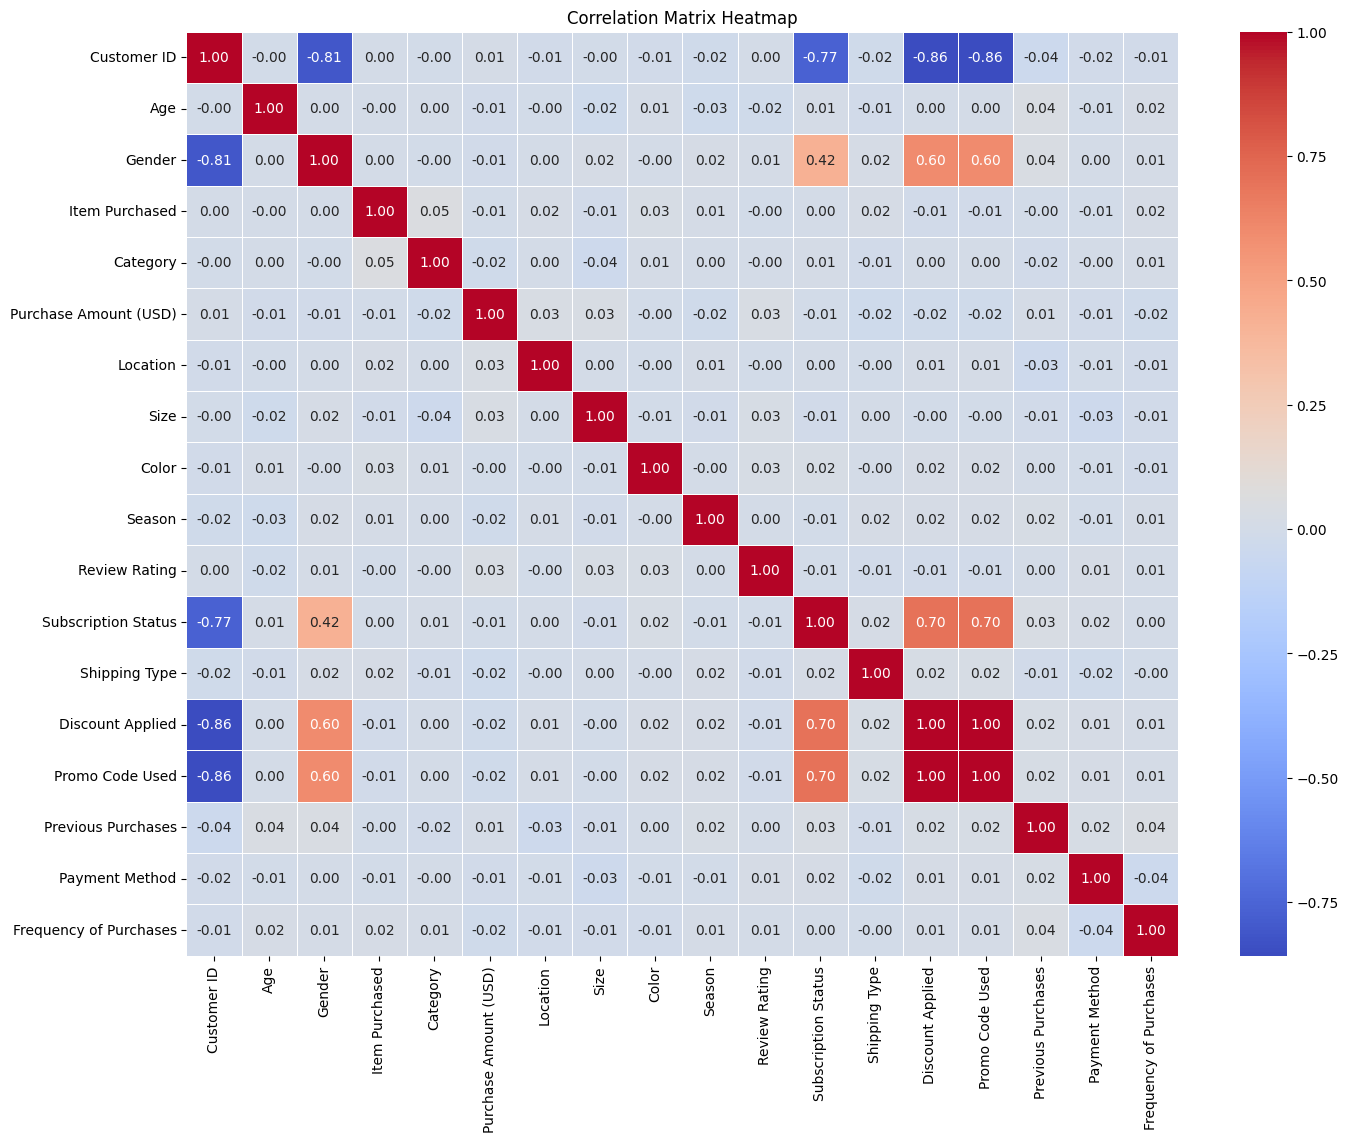

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


4. Linear Regression
● Fit a simple linear regression model to predict Purchase Amount (USD)
based on Age. Interpret the regression coefficients.
● Determine the goodness-of-fit (R-squared value).
● Visualize the regression line on the scatter plot. Make predictions using the
regression model for new ages 25, 35, and 45.

Regression Coefficients: [-0.02131263]
Intercept: 61.08161971036121
R-squared value: -0.00665949593704207


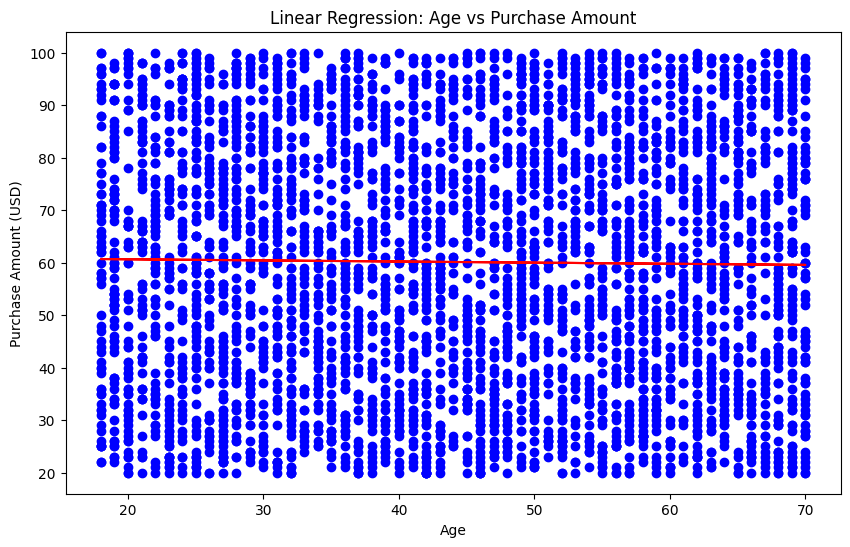

Predictions for ages 25, 35, and 45: [60.548804   60.33567772 60.12255144]


c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# Define the predictor and target variables
X = df[['Age']]
y = df['Purchase Amount (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Regression coefficients
print(f'Regression Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')

# Goodness-of-fit (R-squared value)
r_squared = lin_reg.score(X_test, y_test)
print(f'R-squared value: {r_squared}')

# Visualize the regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red')
plt.title('Linear Regression: Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Make predictions for new ages 25, 35, and 45
new_ages = np.array([[25], [35], [45]])
predictions = lin_reg.predict(new_ages)
print(f'Predictions for ages 25, 35, and 45: {predictions}')


5. Multiple Linear Regression
● Fit a multiple linear regression model to predict Purchase Amount (USD)
based on Age, Gender, Location, and Review Rating.
● Interpret the regression coefficients and their significance.
● Determine the goodness-of-fit (R-squared value).
● Make predictions using the regression model for specific values of the
predictors.

In [7]:
# Define the predictor and target variables
X = df[['Age', 'Gender', 'Location', 'Review Rating']]
y = df['Purchase Amount (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
mult_lin_reg = LinearRegression()
mult_lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = mult_lin_reg.predict(X_test)

# Regression coefficients and their significance
coefficients = pd.DataFrame(mult_lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Goodness-of-fit (R-squared value)
r_squared = mult_lin_reg.score(X_test, y_test)
print(f'R-squared value: {r_squared}')

# Make predictions for specific values of the predictors
specific_values = np.array([[30, 1, 10, 4.5]])
prediction = mult_lin_reg.predict(specific_values)
print(f'Prediction for specific values: {prediction}')


               Coefficient
Age              -0.020063
Gender           -0.441871
Location          0.057743
Review Rating     0.882617
R-squared value: -0.004919931610369188
Prediction for specific values: [60.11103352]


c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6. Logistic Regression
● Fit a logistic regression model to predict Subscription Status based on
Age, Gender, and Review Rating.
● Interpret the regression coefficients.
● Evaluate the model using accuracy, precision, recall, and F1-score.
● Create a confusion matrix to visualize the model's performance.

               Coefficient
Age               0.000704
Gender            4.900287
Review Rating    -0.017305
Accuracy: 0.7153846153846154
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\satch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


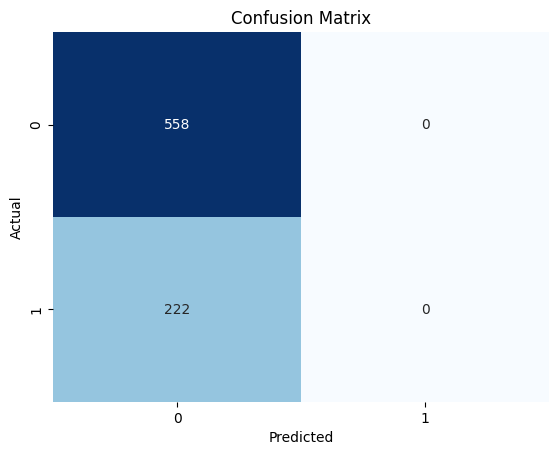

In [8]:
# Define the predictor and target variables
X = df[['Age', 'Gender', 'Review Rating']]
y = df['Subscription Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Regression coefficients
coefficients = pd.DataFrame(log_reg.coef_.T, X.columns, columns=['Coefficient'])
print(coefficients)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1_score}')

# Create a confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


7. Decision Tree Regression
● Fit a decision tree regression model to predict Purchase Amount (USD)
based on Age, Gender, and Previous Purchases.
● Visualize the decision tree.
● Evaluate the model using metrics such as Mean Absolute Error (MAE), Mean
Squared Error (MSE), and R-squared.
● Compare the decision tree model with a multiple linear regression model.

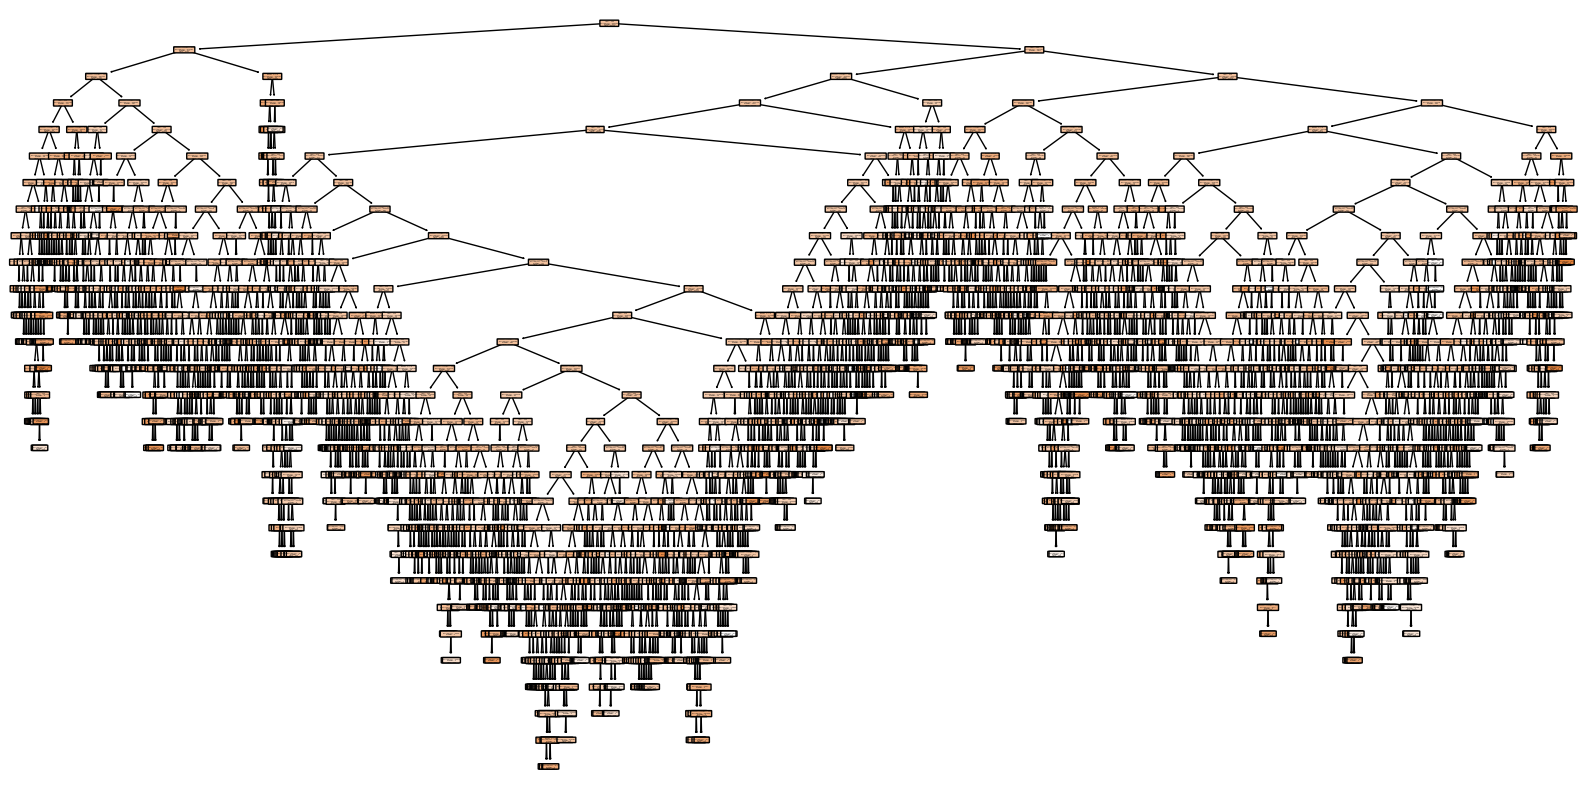

Mean Absolute Error: 26.134273504273505
Mean Squared Error: 1028.4630683760683
R-squared value: -0.8379118432148824
Multiple Linear Regression - Mean Absolute Error: 20.74662861556256
Multiple Linear Regression - Mean Squared Error: 562.9517280376069
Multiple Linear Regression - R-squared value: -0.006021197972923664


In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the predictor and target variables
X = df[['Age', 'Gender', 'Previous Purchases']]
y = df['Purchase Amount (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared value: {r_squared}')

# Compare the decision tree model with a multiple linear regression model
mult_lin_reg.fit(X_train, y_train)
y_pred_mult = mult_lin_reg.predict(X_test)

mae_mult = mean_absolute_error(y_test, y_pred_mult)
mse_mult = mean_squared_error(y_test, y_pred_mult)
r_squared_mult = r2_score(y_test, y_pred_mult)

print(f'Multiple Linear Regression - Mean Absolute Error: {mae_mult}')
print(f'Multiple Linear Regression - Mean Squared Error: {mse_mult}')
print(f'Multiple Linear Regression - R-squared value: {r_squared_mult}')
